In [1]:
import mesa
import matplotlib.pyplot as plt
import numpy as np
import random

from mesa.time import RandomActivation

In [ ]:
class FoodAgent(mesa.Agent):
    """ Agent representing the resource items """
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.position = (0,0)
        self.enery_value = 2 # called Er in paper
        self.regrowth = None # random timepoint in a year where they regrow
    
    def set_position(self, width, height):
        self.position = (width, height)

In [2]:
class PreyAgent(mesa.Agent):
    """An agent that is a prey, as described in the paper."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        # non-evolvable parameters
        self.age = 0
        self.energy = 100000 # TODO what energy level do they start with?
        self.position = (0,0) # TODO make this randomised
        self.df = 2 # search radius of forager, TODO find initial value
        self.af = 270 # search angle, angle between food and forward direction
        self.tf = 3 # foodscan duration, TODO find initial value
        self.food_target = None
        self.zl = 50 # alignment zone
        self.dr = 0.9 # individual reach
        self.max_speed = 0.1
        self.max_neighbour_awareness = 50 # meters
        self.h = 5 # half-max distance detect predator
        self.N = 5 # scaling for predator detection
        self.em = 1 # metabolism 
        self.min_energy = 0 
        self.max_energy = 100000 # called eM in paper
        self.death_rate = 0.1
        self.max_age = 60*24*365*20 # 20 years expressed in minutes
        self.mutation_rate = 0.05
        self.is_safe = False
        self.waiting_time = 0 # TODO find initial value

        # evolvable parameters
        self.zr = 20 # repulsion zone, affected by evolution, TODO set it to random value between 0 and 50, sd = 10
        self.za = 30 # attractrion zone, affected by evoluiton, TODO set it to random value between self.zr and 50, sd = 10
        self.aa = 72 # maximum turning angle for attraction TODO set between 0 and 360, sd = 72
        self.ar = 72 # maximum turning angle for repulsion TODO set between 0 and 360, sd = 72
 
    def step(self):
        self.age = self.age + 1
        self.energy = self.energy - self.em

        # Waiting time
        if self.is_safe == True:
            self.waiting_time = self.waiting_time - 1
        if self.waiting_time == 0:
            self.is_safe = False
        
        # Reproduction
        if self.model.num_prey_agents > 10 and self.energy >= self.eM:
            self.energy = self.energy - self.max_energy / 2
            a = PreyAgent(self.num_prey_agents + 1, self)
            self.num_prey_agents = self.num_prey_agents + 1
            a.set_energy(self.max_energy / 2)
            # TODO offspring inherit all evolvable parameters + mutate, maybe make functions inherit() and evolve()
        if self.model.num_prey_agents < 10:
            # TODO choose random parent, force birth with no energy cost


    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def distance(self, fooditem):
        # calculates distance between self and food item
    
    # get new food target or not
    def foodscan(self):
        chosenitem = 100000
        
        # find all fooditems in range
        for fooditem in range(len(self.model.fooditems)):
            p = (self.tf * 60) / (np.pi * pow(self.df,2) * (self.af/np.pi) ) # we assume this function represents the vision
            RAND = random.random()
            if RAND < p:
                if distance(self, fooditem) < chosenitem:
                    chosenitem = fooditem
        
        return chosenitem
    
    def move_to_food(self):
        ...
    
    def eat(self):
        ...
    
    def scan(self):
        ...
    
    def flee(self):
        ...

    def set_energy(new_energy):
        self.energy = new_energy



In [3]:
class Model(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_prey_agents = N
        self.num_resources = width * height * 0.535 # probability found in paper
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.fooditems = []

        # Place food items
        for resource in range(self.num_resources):
            a = FoodAgent(resource, self)
            cell = mesa.find_empty()
            mesa.place_agent(a, cell)
            # TODO change position field of food item to the position of cell

        # Create prey agents
        for i in range(self.num_agents):
            a = PreyAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        """Advance the model by one step."""
        self.schedule.step() # model shuffles the order of the agents, then activates and executes each agent’s step method

In [4]:
model = Model(50, 10, 10)
for i in range(20):
    model.step()

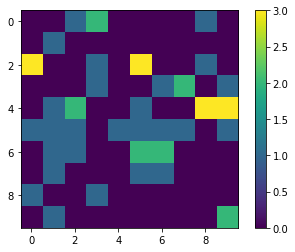

In [5]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()


In [6]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth) + 1))

# y axis: number of agents
# x axis: wealth
# So each bin contains the number of agents with a certain wealth
# So 421 agents have 1 wealth, 320 agents have 2 wealth, etc

TypeError: __init__() missing 2 required positional arguments: 'width' and 'height'